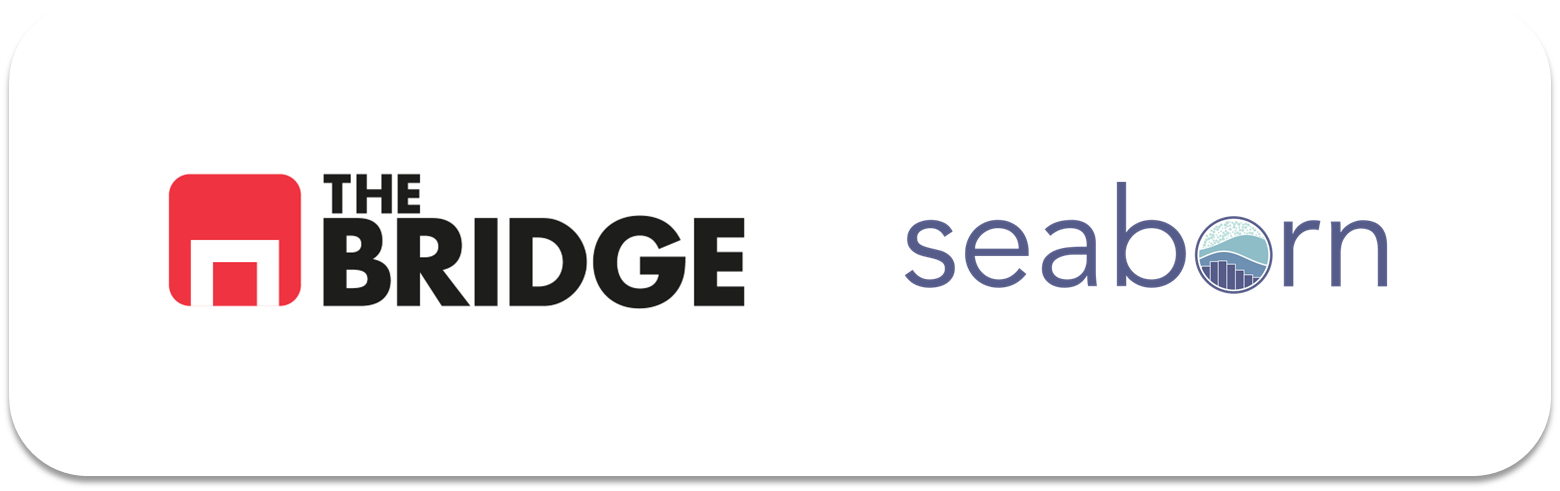

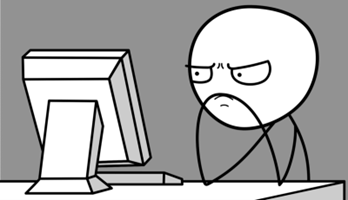

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [4]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [5]:
def analizar_categoricas(df: pd.DataFrame, col1: str, col2: str):
    """
    Dibuja:
      1. Dos countplots (frecuencias absolutas) en una figura con 1 fila y 2 columnas.
      2. Un catplot comparando col1 y col2 (usando col2 como 'col').
    Y devuelve la tabla de contingencia de ambas columnas.
    """

    # ========= 1. FIGURA CON DOS COUNTPLOTS ==========
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Frecuencias absolutas de col1
    sns.countplot(x=df[col1], ax=axs[0])
    axs[0].set_title(f"Frecuencias absolutas de {col1}")
    axs[0].set_xlabel(col1)
    axs[0].set_ylabel("Frecuencia")

    # Frecuencias absolutas de col2
    sns.countplot(x=df[col2], ax=axs[1])
    axs[1].set_title(f"Frecuencias absolutas de {col2}")
    axs[1].set_xlabel(col2)
    axs[1].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

    # ========= 2. CATPLOT DE AMBAS COLUMNAS ==========
    sns.catplot(
        data=df,
        x=col1,
        col=col2,
        kind="count",
        height=4
    )

    plt.show()

    # ========= 3. TABLA DE CONTINGENCIA ==========
    tabla = pd.crosstab(df[col1], df[col2])

    return tabla



### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

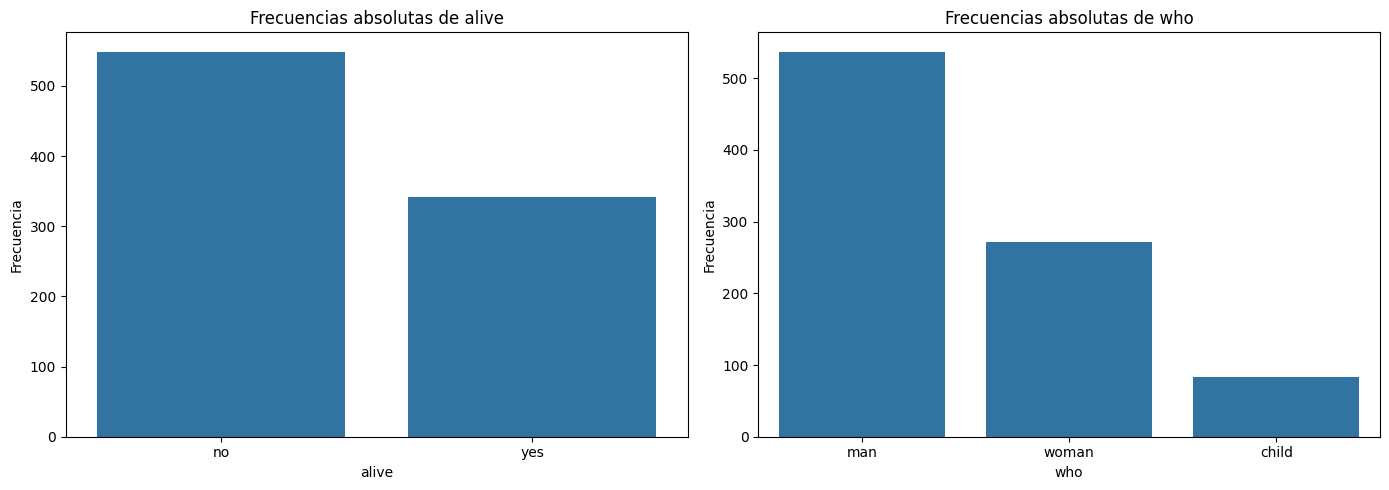

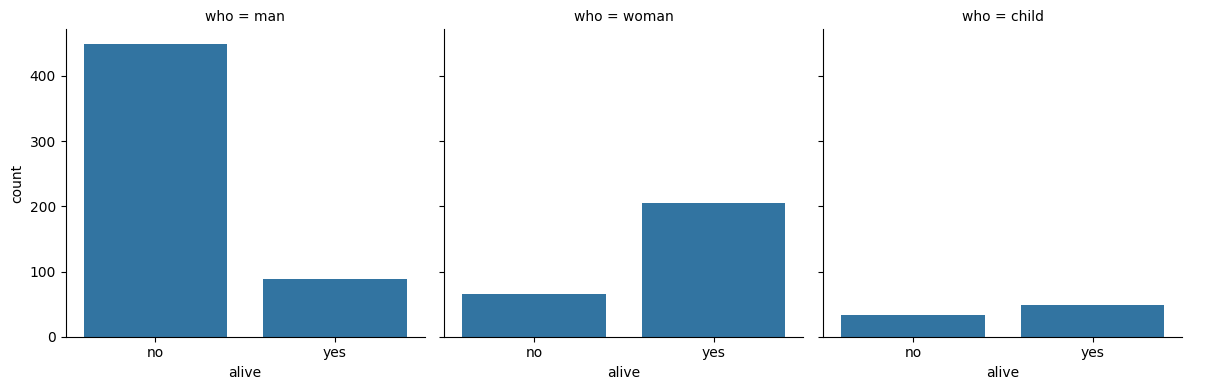

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [6]:
analizar_categoricas(df_titanic, "alive", "who")

#### Alive y Class

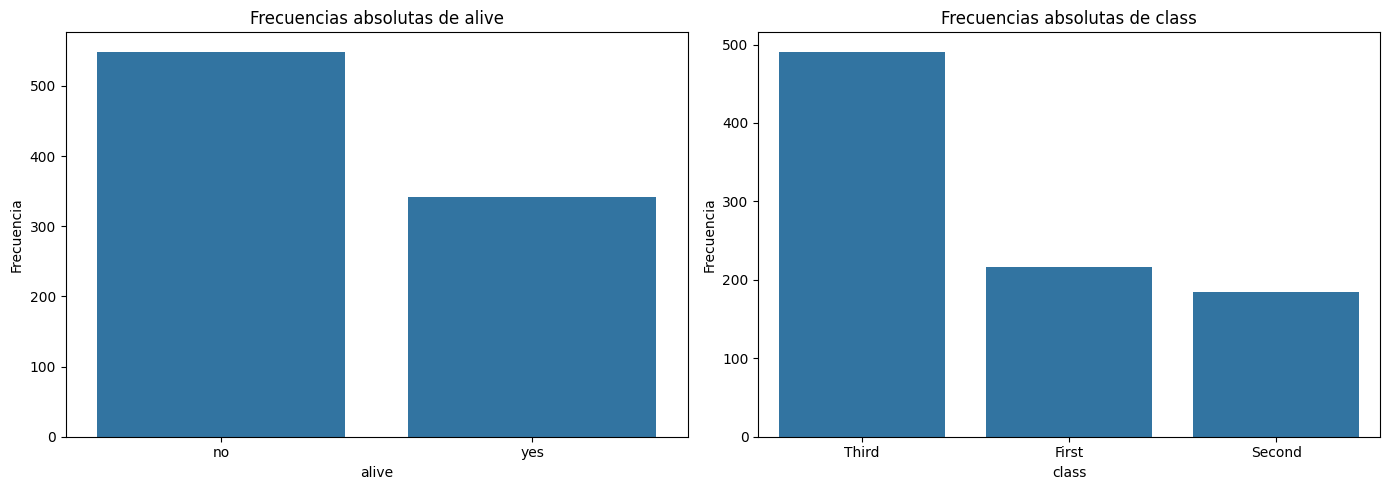

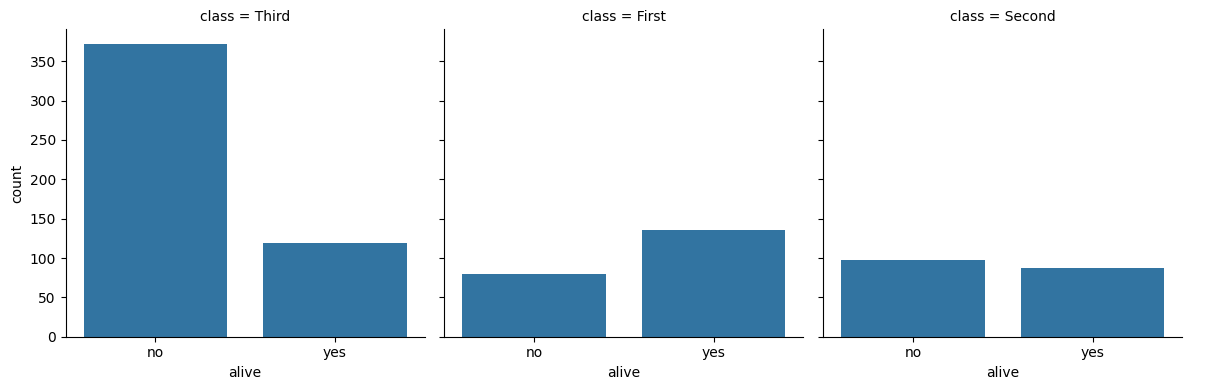

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [7]:
analizar_categoricas(df_titanic, "alive", "class")

### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [ ]:
def comparar_cat_num(df: pd.DataFrame, col_cat: str, col_num: str):
    """
    Para cada valor de la variable categórica:
      - Dibuja un histograma de la variable numérica filtrada por ese valor.
      - Organiza los histogramas en una matriz con un máximo de 3 columnas.
    """

    # Obtener los valores únicos de la variable categórica
    valores = df[col_cat].unique()
    n_vals = len(valores)

    # Matriz de 3 columnas como máximo
    n_cols = 3
    n_rows = (n_vals + n_cols - 1) // n_cols  # cálculo de filas necesario

    # Crear figura y matriz de subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

    # Asegurar que axs siempre sea 2D
    axs = axs.reshape(n_rows, n_cols)

    # Recorrer valores únicos de la categórica
    for i, valor in enumerate(valores):
        fila = i // n_cols
        col = i % n_cols

        # Filtrar el dataframe por el valor categórico
        datos_filtrados = df[df[col_cat] == valor][col_num]

        # Dibujar histograma
        axs[fila, col].hist(
            datos_filtrados, 
            bins=20, 
            edgecolor="black")

        # Título
        axs[fila, col].set_title(
            f"Histograma de {col_num} para el valor {valor}"
        )

        axs[fila, col].set_xlabel(col_num)
        axs[fila, col].set_ylabel("Frecuencia")

    # Si sobran casillas vacías, desactivar ejes
    for j in range(i + 1, n_rows * n_cols):
        fila = j // n_cols
        col = j % n_cols
        axs[fila, col].axis("off")

    plt.tight_layout()
    plt.show()


### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

1️⃣ Control del número de bins

Argumento: bins: int = 20

Permite ajustar la cantidad de intervalos del histograma según la dispersión de los datos.

`axs[fila, col].hist(datos_filtrados, bins=bins, edgecolor="black")`


2️⃣ Color del histograma

Argumento: color: str = "skyblue"

Para cambiar el color de las barras y diferenciar visualmente las categorías.

`axs[fila, col].hist(datos_filtrados, bins=bins, edgecolor="black", color=color)`



3️⃣ Mostrar densidad (normalización)

Argumento: density: bool = False

En lugar de frecuencias absolutas, muestra la densidad (probabilidad).

`axs[fila, col].hist(datos_filtrados, bins=bins, edgecolor="black", density=density)
axs[fila, col].set_ylabel("Densidad" if density else "Frecuencia")`



4️⃣ Incluir KDE (curva de densidad)

Argumento: kde: bool = False

Usar seaborn para añadir la curva de densidad sobre el histograma, útil para comparar distribuciones.

`if kde:
    sns.kdeplot(datos_filtrados, ax=axs[fila, col], color='red')`



5️⃣ Número máximo de columnas

Argumento: max_cols: int = 3

Permite decidir cuántas columnas por fila, útil si tienes muchas categorías.

`n_cols = max_cols
n_rows = (n_vals + n_cols - 1) // n_cols`


#### Aircompany e Ingresos

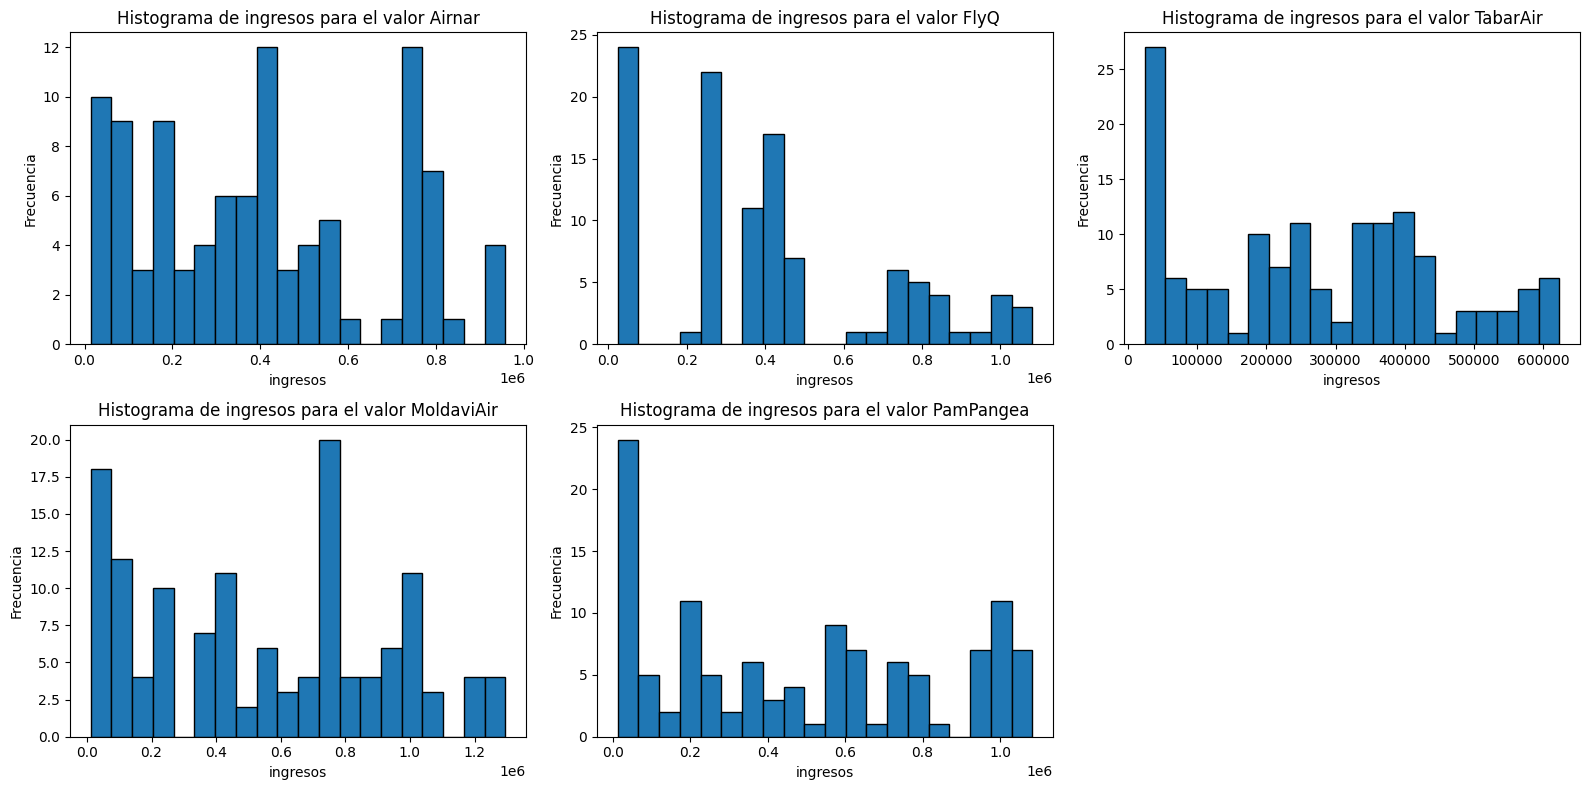

In [9]:
comparar_cat_num(df_viajes, "aircompany","ingresos")

#### Aircompany y Consumo_kg

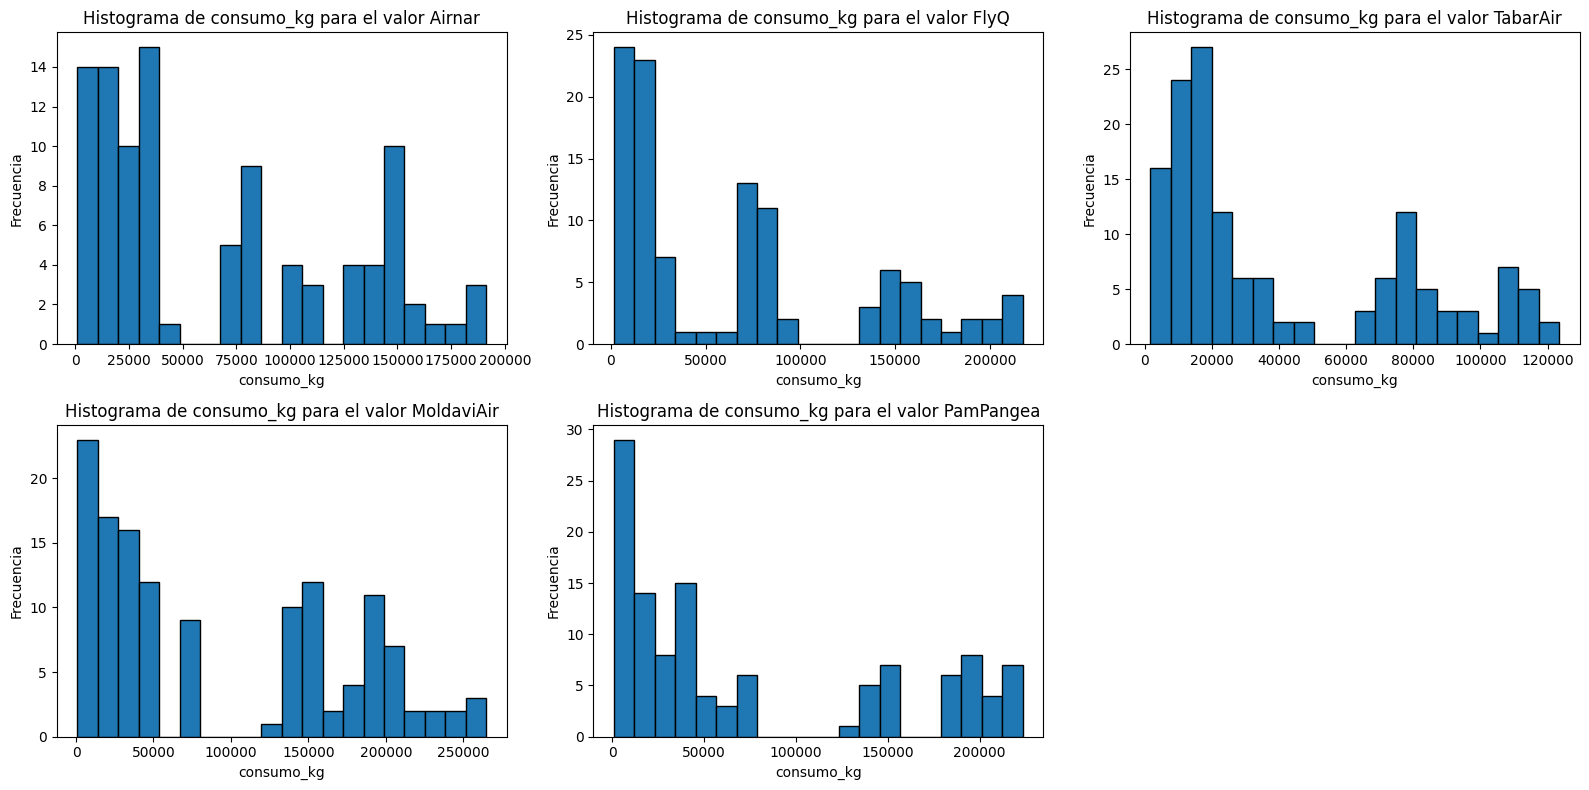

In [10]:
comparar_cat_num(df_viajes, "aircompany","consumo_kg")

### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [11]:
def scatter_plot(df, col_num_x, col_num_y, col_cat=None, tamaño=50):
    """
    Dibuja un diagrama de dispersión usando Seaborn.
    
    Parámetros:
    - df: dataframe que contiene los datos
    - col_num_x: columna numérica para el eje X
    - col_num_y: columna numérica para el eje Y
    - col_cat: columna categórica opcional para colorear los puntos (default=None)
    - tamaño: tamaño de los puntos en el scatter plot
    """
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(8,6))
    
    # Si se proporciona columna categórica, se usa como hue
    if col_cat is not None:
        sns.scatterplot(
            data=df,
            x=col_num_x,
            y=col_num_y,
            hue=col_cat,
            s=tamaño
        )
    else:
        sns.scatterplot(
            data=df,
            x=col_num_x,
            y=col_num_y,
            s=tamaño
        )
    
    plt.xlabel(col_num_x)
    plt.ylabel(col_num_y)
    
    if col_cat is not None:
        plt.legend(title=col_cat)
    
    plt.title(f"Diagrama de dispersión de {col_num_y} vs {col_num_x}")
    plt.tight_layout()
    plt.show()


### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

Si el objetivo es que la función sea más **útil como herramienta de visualización para análisis exploratorio o presentación**, hay varios ajustes y mejoras que haría:

---

### 1️⃣ **Añadir flexibilidad en colores**

* **Añadir un argumento `palette`** para elegir la paleta de colores de Seaborn según la categoría.
* Si no se pasa, usar paleta por defecto.
* Esto hace que la visualización sea más clara y estética.

```python
palette=None
sns.scatterplot(..., hue=col_cat, s=tamaño, palette=palette)
```

---

### 2️⃣ **Control de estilo de los puntos**

* Argumento opcional `marker` para cambiar la forma de los puntos (`'o'`, `'s'`, `'D'`, etc.).
* Útil para diferenciar categorías si se imprime en blanco y negro o se quiere resaltar grupos.

---

### 3️⃣ **Añadir transparencia (`alpha`)**

* Argumento opcional `alpha=0.7` para que se vean mejor los puntos superpuestos.
* Muy importante cuando hay muchos datos.

```python
sns.scatterplot(..., alpha=alpha)
```

---

### 4️⃣ **Opcional de mostrar líneas de tendencia**

* Argumento `regression=False` o `line=False`.
* Si `True`, usar `sns.lmplot` o añadir `sns.regplot` para mostrar la tendencia lineal.

---

### 5️⃣ **Quitar cosas innecesarias o mejorar legibilidad**

* Actualmente se añade `plt.tight_layout()` y `plt.show()`, lo cual está bien.
* Pero si la función se va a usar en paneles de subplots o en notebooks, podrías **devolver la figura y los ejes** en lugar de hacer `plt.show()` directamente.
* Esto permite que el usuario agregue títulos adicionales, anotaciones, o combine gráficos.

```python
return plt.gcf(), plt.gca()
```

---

### 6️⃣ **Título más flexible**

* Argumento opcional `title=None`.
* Si no se pasa, se genera uno por defecto; si se pasa, se usa el que desee el usuario.

---

### 7️⃣ **Remarcar etiquetas y leyenda**

* Ajustar tamaño de leyenda y etiquetas (`fontsize`) para que sea más legible.
* Ejemplo:

```python
plt.xlabel(col_num_x, fontsize=12)
plt.ylabel(col_num_y, fontsize=12)
plt.legend(title=col_cat, fontsize=10, title_fontsize=12)
```



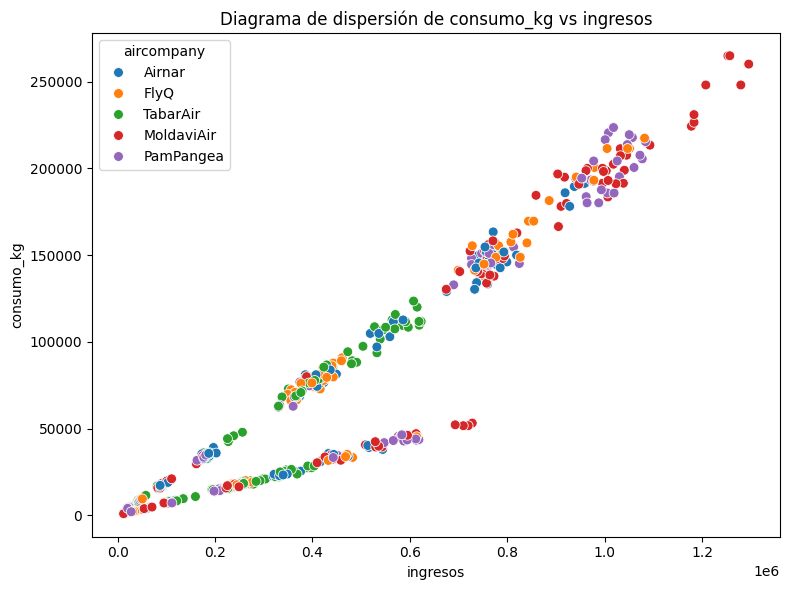

In [14]:
scatter_plot(df_viajes, "ingresos", "consumo_kg", "aircompany")

### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?